### 高维数据向低维数据映射
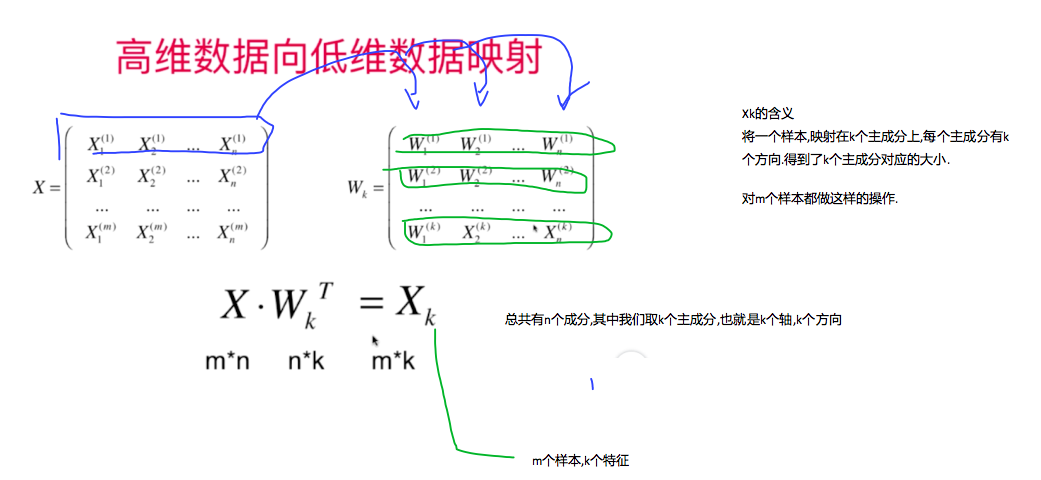

### 低维数据向高维数据恢复
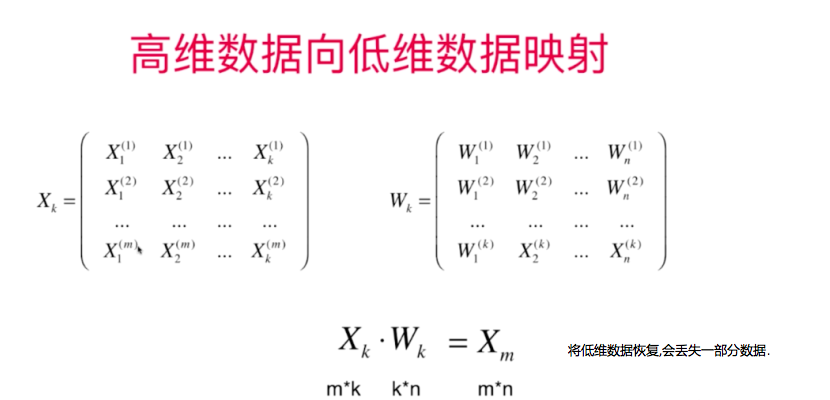

###  sklearn中的PCA使用方式
1. 实例化PCA类
2. 对数据集进行fit,传入n_component,获得对应维度的w
3. 对数据集进行transform,获得降维后的数据集

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.component_  = None
    
    def fit(self, X, eta=0.01, n_iters=1e4):
        def demean(X):
            return  X - np.mean(X,axis = 0)
    
        def f(w,X):
            return np.sum((X.dot(w)**2))/len(X)

        def df(w,X):
            return X.T.dot(X.dot(w))*2. /len(X)

        def derection(w):
            return w / np.linalg.norm(w)

        def first_componet(X,initial_w,eta,n_iters = 1e4,epsilon = 1e-8):

            w = derection(initial_w)
            c_iters = 0

            while c_iters < n_iters:
                gradient = df(w,X)
                last_w = w
                # 注意点1:此处的w为方向向量,应该做处理.
                w = w + eta * gradient
                w = derection(w)
                if (abs(f(w,X) -f(last_w,X)) < epsilon):
                    break

                c_iters += 1


            return w

        X_pca = X.copy()
        X_pca = demean(X_pca)
        self.component_ = np.empty((self.n_components,X.shape[1]))
        for i in range(self.n_components):
            innitial_w = np.random.random(X_pca.shape[1])
            w = first_componet(X_pca,innitial_w,eta)
            self.component_[i,:] = w
            X_pca = X_pca - X_pca.dot(w).reshape(-1,1)*w

        return self
    
    def transform(self,X):
        return X.dot(self.component_.T)
    
    def inverse_transform(self,X):
        return X.dot(self.component_)
    
    def __repr__(self):
        return "PCA(n_components=%d)" % self.n_components

In [ ]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size = 100)
# 生成 0~100 的随机浮点数. 随机分布
X[:,1] = 0.75 * X[:,0] +3. + np.random.normal(0,10.,size = 100)

In [24]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [25]:
pca.component_

array([[ 0.75407078,  0.65679316],
       [-0.65678953,  0.75407394]])

In [26]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [30]:
## 看看降维的数据的变化情况
X_reduction  = pca.transform(X)
X_recovery = pca.inverse_transform(X_reduction)

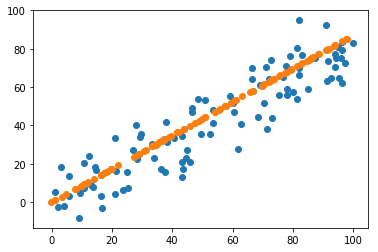

In [34]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_recovery[:,0],X_recovery[:,1])
plt.show()

可以看出,降维后的数据,恢复到二维平面,依然是一条直线,只是在高维空间表达低维而已. 一条直线也可以用一维表示.

###  Scikit_learn中的PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=1)

In [37]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
pca.components_

array([[-0.7540708 , -0.65679315]])

In [40]:
X_reduction = pca.transform(X)
X_restore  = pca.inverse_transform(X_reduction)

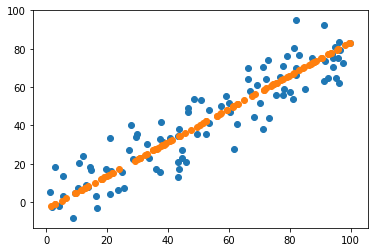

In [41]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_restore[:,0],X_restore[:,1])
plt.show()